In [5]:
b=pd.read_csv("GUIDE_Train.csv.zip")
b1=b.to_csv("train.csv")
#c=pd.read_csv("new_train_sample.zip")

In [3]:
b.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
#c1=c.to_csv("test.csv")
b1=b.to_csv("train.csv")

**Microsoft : Classifying Cybersecurity Incidents with Machine Learning**

Read the data set  

In [5]:
import pandas as pd
df=pd.read_csv("train.csv")

In [9]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [11]:
df1=df.isna().sum()
df1.sort_values(ascending=False)

ResourceType          9509762
ActionGranular        9460773
ActionGrouped         9460773
ThreatFamily          9441956
EmailClusterId        9420025
AntispamDirection     9339535
Roles                 9298686
SuspicionLevel        8072708
LastVerdict           7282572
MitreTechniques       5468386
IncidentGrade           51340
ApplicationId               0
FileName                    0
RegistryValueData           0
RegistryValueName           0
OAuthApplicationId          0
ApplicationName             0
Unnamed: 0                  0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion                   0
CountryCode                 0
State                       0
RegistryKey                 0
DeviceName                  0
NetworkMessageId            0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle

**Dropping the Null columns**

In [12]:
# Check for columns with null values
null_columns = df.columns[df.isnull().any()]
# Print columns with null values
print(f"Columns with null values: {null_columns}")

# Drop columns with null values
df_cleaned = df.dropna(axis=1)

# Check the remaining columns
print(f"Remaining columns after dropping: {df_cleaned.columns}")


Columns with null values: Index(['MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular',
       'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict'],
      dtype='object')
Remaining columns after dropping: Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')


In [14]:
df_cleaned.head(2)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,Ip,...,3421,881,289573,117668,3586,5,66,31,6,3
1,1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [16]:
df.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [18]:


# Automatically detect categorical and continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Check for null values in continuous and categorical columns
print("Continuous Columns with null values:")
print(df[continuous_columns].isnull().sum())

print("\nCategorical Columns with null values:")
print(df[categorical_columns].isnull().sum())

# Fill continuous columns with the mean
df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].mean())

# Fill categorical columns with the mode (most frequent value)
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Check if any null values remain
print("\nNull values after filling:")
print(df.isnull().sum())


Continuous Columns with null values:
Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
DetectorId                  0
AlertTitle                  0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion                   0
CountryCode                 0
State                       0
City                        0
dty

MemoryError: Unable to allocate 72.6 MiB for an array with shape (9516837,) and data type int64

In [21]:
import pandas as pd

# Function to process each chunk
def process_chunk(chunk):
    # Handle nulls for categorical columns by filling with mode or 'Unknown'
    categorical_columns = ['MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular',
                           'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']
    
    for col in categorical_columns:
        # Fill NaN with mode (most frequent value) or 'Unknown'
        if chunk[col].isnull().any():
            mode_value = chunk[col].mode()[0] if not chunk[col].mode().empty else 'Unknown'
            chunk[col].fillna(mode_value, inplace=True)
    
    return chunk

# Reading the CSV in chunks
chunk_size = 100000  # Define a chunk size to manage memory
filename = "GUIDE_Test.csv.zip"
chunks = pd.read_csv(filename, chunksize=chunk_size)

# Process each chunk and append to a list (or write back to a new file)
processed_chunks = []

for chunk in chunks:
    processed_chunk = process_chunk(chunk)
    processed_chunks.append(process_chunk(chunk))  # Append processed chunk

# Concatenate all chunks after processing
df_processed = pd.concat(processed_chunks, ignore_index=True)

# Save the processed dataframe if needed
#df_processed.to_csv("processed_GUIDE_Test.csv.zip", index=False)


MemoryError: Unable to allocate 7.63 MiB for an array with shape (10, 100000) and data type int64

In [6]:

file_path = 'train.csv'
train_data = pd.read_csv(file_path, nrows=10000)
train_data.info() 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   Id                  10000 non-null  int64  
 2   OrgId               10000 non-null  int64  
 3   IncidentId          10000 non-null  int64  
 4   AlertId             10000 non-null  int64  
 5   Timestamp           10000 non-null  object 
 6   DetectorId          10000 non-null  int64  
 7   AlertTitle          10000 non-null  int64  
 8   Category            10000 non-null  object 
 9   MitreTechniques     4201 non-null   object 
 10  IncidentGrade       9947 non-null   object 
 11  ActionGrouped       59 non-null     object 
 12  ActionGranular      59 non-null     object 
 13  EntityType          10000 non-null  object 
 14  EvidenceRole        10000 non-null  object 
 15  DeviceId            10000 non-null  int64  
 16  Sha25

In [29]:
categorical_columns =train_data.select_dtypes(include=['object', 'category']).columns
continious_columns=train_data.select_dtypes(include=['float', 'int']).columns

In [31]:
categorical_columns


Index(['Timestamp', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [37]:
continious_columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId',
       'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath',
       'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State',
       'City'],
      dtype='object')

In [7]:
nullvalues = train_data.isna().sum()
nullvalues.sort_values(ascending=False)

ResourceType          9992
ActionGranular        9941
ActionGrouped         9941
ThreatFamily          9923
EmailClusterId        9881
AntispamDirection     9823
Roles                 9789
SuspicionLevel        8462
LastVerdict           7600
MitreTechniques       5799
IncidentGrade           53
ApplicationId            0
FileName                 0
RegistryValueData        0
RegistryValueName        0
OAuthApplicationId       0
ApplicationName          0
Unnamed: 0               0
FolderPath               0
ResourceIdName           0
OSFamily                 0
OSVersion                0
CountryCode              0
State                    0
RegistryKey              0
DeviceName               0
NetworkMessageId         0
Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
EntityType               0
EvidenceRole             0
D

**Drop all maximum null columns**

In [7]:
columns_to_drop=["ResourceType",          
"ActionGranular",       
"ActionGrouped",         
"ThreatFamily",          
"EmailClusterId",       
"AntispamDirection",     
"Roles",                 
"SuspicionLevel",        
"LastVerdict",           
"MitreTechniques"]      


# Drop the specified columns
train_data = train_data.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(train_data.columns)

Remaining columns after dropping:
Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')


In [8]:
train_data.to_csv("train.csv")

In [9]:
import pandas as pd

# Load the CSV file with low_memory=False to avoid dtype warnings
df = pd.read_csv("train.csv", low_memory=False)

# Check for columns with missing values
missing_values = df.isnull().sum()

# Handle missing values for continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in continuous_columns:
    # Fill with mean for continuous columns
    df[column].fillna(df[column].mean(), inplace=True)

# Handle missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    # Fill with mode for categorical columns
    df[column].fillna(df[column].mode()[0], inplace=True)



# Save the updated DataFrame to a new CSV file
df.to_csv("train.csv", index=False)


C:\Users\moham\AppData\Local\Temp\ipykernel_8752\4239555501.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_8752\4239555501.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
df = pd.read_csv("train.csv", low_memory=False)
# Drop columns with indices 0 and 2 (which are 'A' and 'C')
df = df.drop(df.columns[[0, 1]], axis=1)
# Save the updated DataFrame to a new CSV file
df.to_csv("train.csv", index=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   OrgId               10000 non-null  int64 
 2   IncidentId          10000 non-null  int64 
 3   AlertId             10000 non-null  int64 
 4   Timestamp           10000 non-null  object
 5   DetectorId          10000 non-null  int64 
 6   AlertTitle          10000 non-null  int64 
 7   Category            10000 non-null  object
 8   IncidentGrade       10000 non-null  object
 9   EntityType          10000 non-null  object
 10  EvidenceRole        10000 non-null  object
 11  DeviceId            10000 non-null  int64 
 12  Sha256              10000 non-null  int64 
 13  IpAddress           10000 non-null  int64 
 14  Url                 10000 non-null  int64 
 15  AccountSid          10000 non-null  int64 
 16  AccountUpn          100

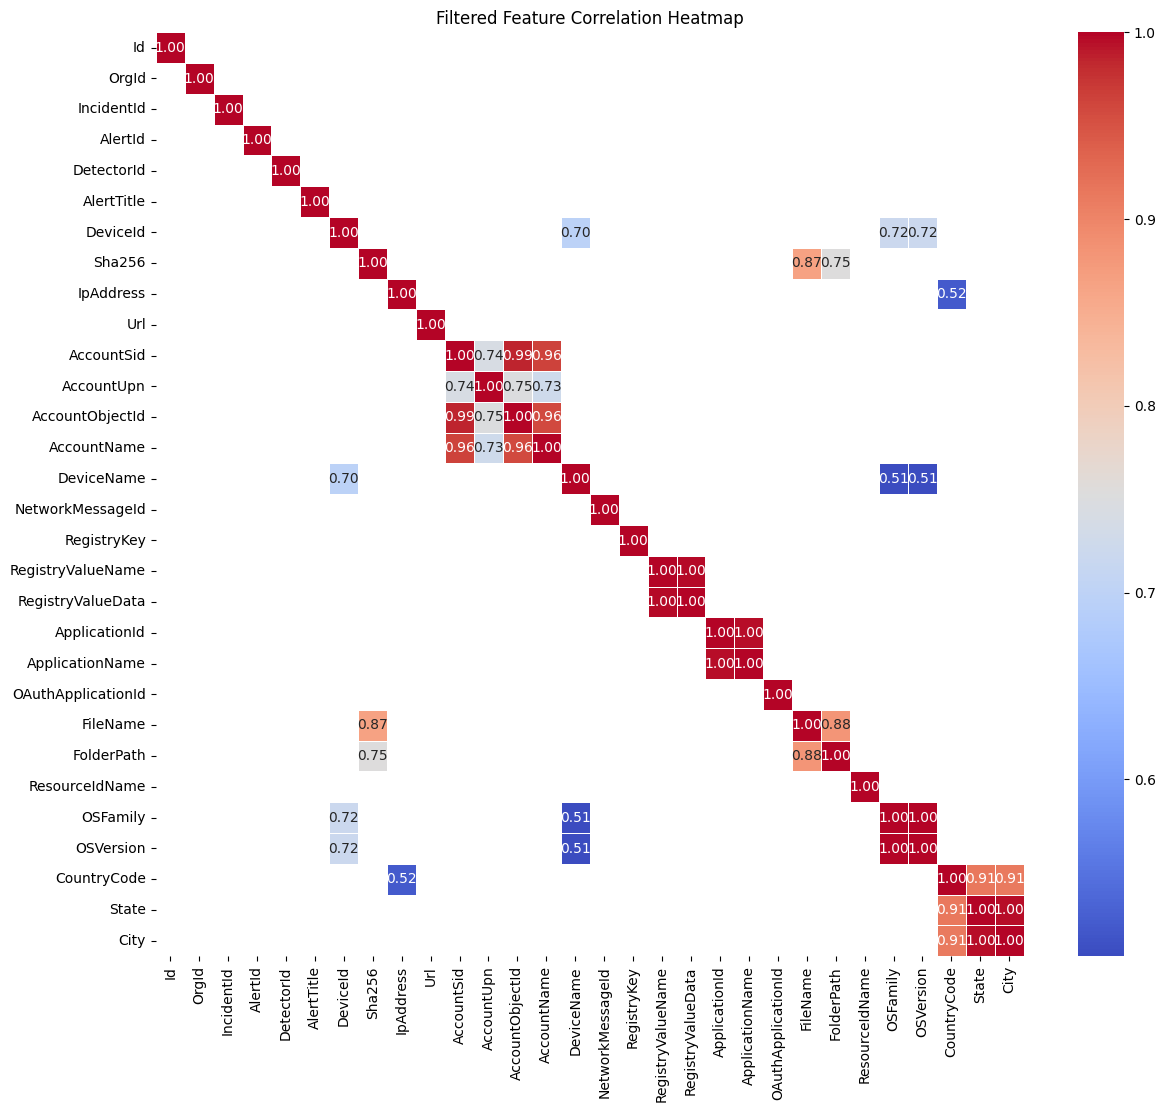

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your pandas DataFrame
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Remove columns with low variance
numeric_data = numeric_data.loc[:, numeric_data.var() > 0.1]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Optionally, filter to show only high correlations (absolute value > 0.5)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) > 0.5]

# Increase the size of the heatmap for better readability
plt.figure(figsize=(14, 12))

# Plot the heatmap with annotations
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set title and display the plot
plt.title('Filtered Feature Correlation Heatmap')
plt.show()


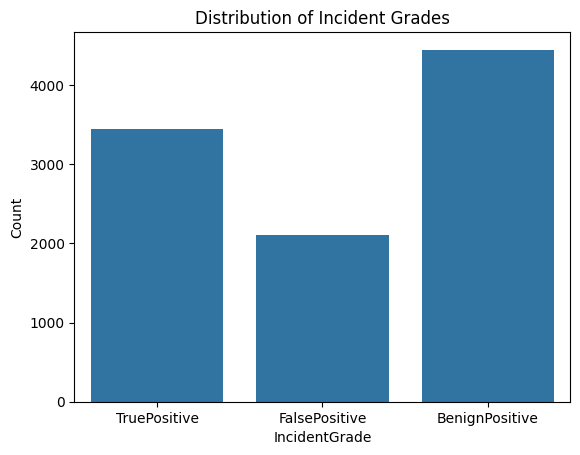

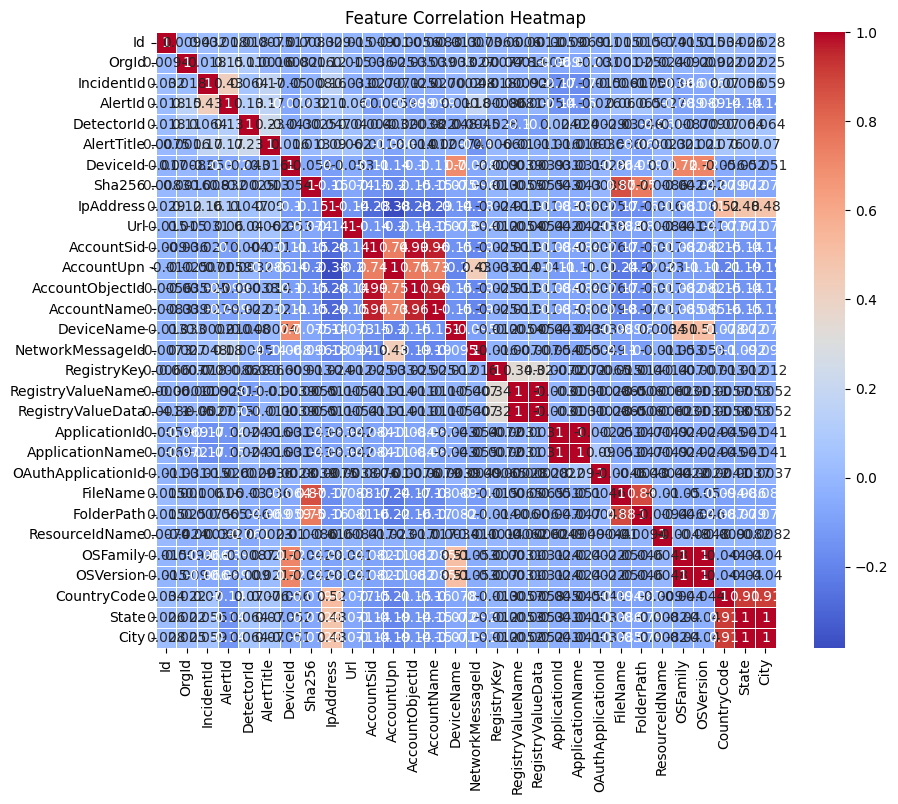

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a pandas DataFrame
# Plot the distribution of the target variable (Assuming the target is 'IncidentGrade')
sns.countplot(x='IncidentGrade', data=df)
plt.title('Distribution of Incident Grades')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_14244\4171686505.py:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='orange')
C:\Users\moham\AppData\Local\Temp\ipykernel_14244\4171686505.py:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='orange')
C:\Users\moham\AppData\Local\Temp\ipykernel_14244\4171686505.py:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='orange')
C:\Users\moham\AppData\Local\Temp\ipykernel_14244\4171686505.py:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an err

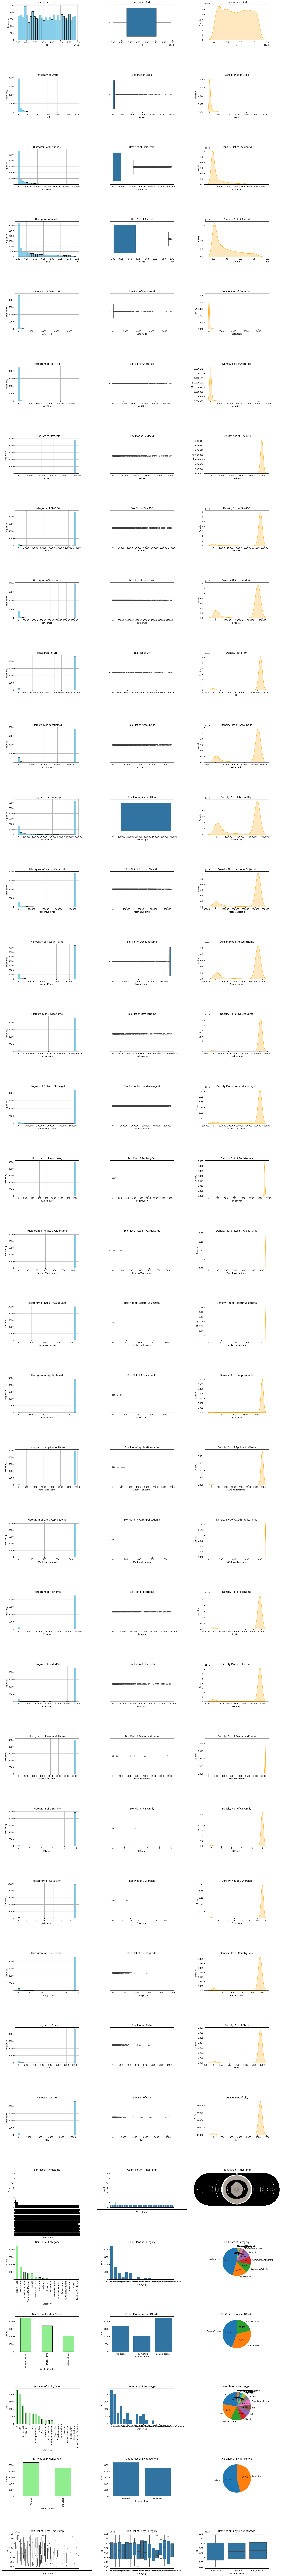

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Identify continuous and categorical columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Set up the matplotlib figure
num_continuous = len(continuous_columns)
num_categorical = len(categorical_columns)

# Calculate the number of subplots needed
total_plots = (num_continuous * 3) + (num_categorical * 3) + (1 if num_categorical and num_continuous else 0)
ncols = 3
nrows = (total_plots // ncols) + (1 if total_plots % ncols != 0 else 0)

plt.figure(figsize=(20, 5 * nrows))

# Counter for subplot indexing
subplot_index = 1

# Loop through continuous columns for EDA plots
for col in continuous_columns:
    # Histogram
    plt.subplot(nrows, ncols, subplot_index)
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    subplot_index += 1

    # Box Plot
    plt.subplot(nrows, ncols, subplot_index)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    subplot_index += 1

    # Density Plot
    plt.subplot(nrows, ncols, subplot_index)
    sns.kdeplot(df[col], shade=True, color='orange')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    subplot_index += 1

# Reset subplot index for categorical plots
subplot_index = 1 + num_continuous * 3  # Adjust based on continuous plots

# Loop through categorical columns for EDA plots
for col in categorical_columns:
    # Bar Plot
    plt.subplot(nrows, ncols, subplot_index)
    df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    subplot_index += 1

    # Count Plot
    plt.subplot(nrows, ncols, subplot_index)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    subplot_index += 1

    # Pie Chart
    plt.subplot(nrows, ncols, subplot_index)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide y-label for pie chart
    subplot_index += 1

# Box Plot by Category for each categorical column against the first continuous column
if continuous_columns and categorical_columns:
    for cat_col in categorical_columns:
        if subplot_index <= nrows * ncols:  # Check if there's space for more subplots
            plt.subplot(nrows, ncols, subplot_index)
            sns.boxplot(x=cat_col, y=continuous_columns[0], data=df)
            plt.title(f'Box Plot of {continuous_columns[0]} by {cat_col}')
            subplot_index += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify continuous and categorical columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Standardization and scaling for continuous features
scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Label encoding for categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder if you need to reverse later

# Display the transformed DataFrame
print("Transformed DataFrame:")
print(df)

# If you need to reverse label encoding later, you can do this:
# for col, le in label_encoders.items():
#     df[col] = le.inverse_transform(df[col])


Transformed DataFrame:
            Id     OrgId  IncidentId   AlertId  Timestamp  DetectorId  \
0    -1.315867 -0.466521   -0.582757 -0.615042       1875   -0.241336   
1    -0.767154 -0.239199   -0.585123 -0.425735       8769   -0.112099   
2     0.433156  1.623289   -0.105060  0.670283       8148    0.812833   
3     0.878985 -0.228866   -0.314870  0.805072       6355   -0.254006   
4    -1.247278 -0.084207   -0.551757 -0.473710       9212   -0.236268   
...        ...       ...         ...       ...        ...         ...   
9995 -0.304177 -0.272781    2.673723  1.017521       7046   -0.259074   
9996 -0.218441 -0.339944   -0.346664 -0.843207       4446   -0.256540   
9997 -1.367309 -0.422607   -0.119489 -0.593275       4933   -0.208393   
9998 -1.435898  0.587425    1.079891  2.110072       3302   -0.053815   
9999 -0.921479 -0.363193    0.617566 -0.221790       9317   -0.188121   

      AlertTitle  Category  IncidentGrade  EntityType  ...  ApplicationName  \
0      -0.265525     

In [16]:
df.to_csv("train.csv", index=False)

In [17]:
import pandas as pd 
df=pd.read_csv("train.csv")
df.head()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,-1.315867,-0.466521,-0.582757,-0.615042,1875,-0.241336,-0.265525,9,2,7,...,0.157125,0.014144,0.325566,0.30138,0.03113,0.153378,0.15341,-3.114337,-3.877864,-3.85674
1,-0.767154,-0.239199,-0.585123,-0.425735,8769,-0.112099,-0.262414,6,1,19,...,0.157125,0.014144,0.325566,0.30138,0.03113,0.153378,0.15341,0.287779,0.263068,0.26243
2,0.433156,1.623289,-0.105060,0.670283,8148,0.812833,-0.240975,9,1,18,...,0.157125,0.014144,0.325566,0.30138,0.03113,0.153378,0.15341,0.287779,0.263068,0.26243
3,0.878985,-0.228866,-0.314870,0.805072,6355,-0.254006,-0.265861,1,0,18,...,0.157125,0.014144,0.325566,0.30138,0.03113,0.153378,0.15341,0.287779,0.263068,0.26243
4,-1.247278,-0.084207,-0.551757,-0.473710,9212,-0.236268,-0.259808,5,2,19,...,0.157125,0.014144,0.325566,0.30138,0.03113,0.153378,0.15341,0.287779,0.263068,0.26243


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Load the datasets
train_df = pd.read_csv('train.csv')  # Adjust the path to your training dataset
test_df = pd.read_csv('test.csv')    # Adjust the path to your testing dataset

# Features and target variable
X = train_df.drop(columns=['IncidentGrade'])  # Replace 'IncidentGrade' with your actual target column
y = train_df['IncidentGrade']

# Encoding categorical variables if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42)
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Make predictions
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_val, y_pred)
    macro_f1 = f1_score(y_val, y_pred, average='macro')
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Macro F1 Score": macro_f1,
        "Classification Report": classification_report(y_val, y_pred)
    }

# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Macro F1 Score: {result['Macro F1 Score']:.4f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "="*60 + "\n")


Training set shape: (8000, 34), Validation set shape: (2000, 34)


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6230
Macro F1 Score: 0.5306
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       889
           1       0.66      0.14      0.24       422
           2       0.69      0.64      0.67       689

    accuracy                           0.62      2000
   macro avg       0.64      0.54      0.53      2000
weighted avg       0.64      0.62      0.59      2000



Model: Decision Tree
Accuracy: 0.8275
Macro F1 Score: 0.8157
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       889
           1       0.76      0.74      0.75       422
           2       0.86      0.84      0.85       689

    accuracy                           0.83      2000
   macro avg       0.82      0.81      0.82      2000
weighted avg       0.83      0.83      0.83      2000



Model: Random Forest
Accuracy: 0.8225
Macro F1 Score: 0.8070

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import xgboost as xgb
from catboost import CatBoostClassifier

# Load your train and test datasets (replace with your actual file paths)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Splitting the features and the target
X_train = train_data.drop('IncidentGrade', axis=1)  # Features (input) from train set
y_train = train_data['IncidentGrade']  # Target (output) from train set

X_test = test_data.drop('IncidentGrade', axis=1)  # Features (input) from test set
y_test = test_data['IncidentGrade']  # Target (output) from test set

# Initialize the models you want to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)
}

# Dictionary to store the results
results = {}

# Loop through the models, train, and evaluate each one
for model_name, model in models.items():
    # Train the model on the train dataset
    model.fit(X_train, y_train)
    
    # Make predictions on the test dataset
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and macro F1 score
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    class_report = classification_report(y_test, y_pred)
    
    # Store the results for each model
    results[model_name] = {
        "Accuracy": accuracy,
        "Macro F1 Score": macro_f1,
        "Classification Report": class_report
    }

# Find the best model based on accuracy or macro F1 score
best_model = max(results, key=lambda x: results[x]['Accuracy'])  # You can also use 'Macro F1 Score' instead

# Print results
print(f"Best Model: {best_model}")
print(f"Accuracy: {results[best_model]['Accuracy'] * 100:.2f}%")
print(f"Macro F1 Score: {results[best_model]['Macro F1 Score']:.2f}")
print("Classification Report:")
print(results[best_model]['Classification Report'])


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Best Model: Random Forest
Accuracy: 62.94%
Macro F1 Score: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.84      0.68      4192
           1       0.59      0.36      0.45      2167
           2       0.80      0.55      0.65      3641

    accuracy                           0.63     10000
   macro avg       0.65      0.58      0.59     10000
weighted avg       0.66      0.63      0.62     10000



In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

# Define the hyperparameter space to search over
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled (you can reduce or increase)
    scoring='accuracy',  # Metric to evaluate
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the search
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Evaluate on the test set with the best parameters
best_rf = random_search.best_estimator_
y_pred_test = best_rf.predict(X_test)

# Accuracy and classification report for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='macro')
class_report = classification_report(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Macro F1 Score: {test_f1:.2f}")
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
147 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.83
Test Accuracy: 0.64
Macro F1 Score: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      4192
           1       0.56      0.35      0.43      2167
           2       0.81      0.56      0.66      3641

    accuracy                           0.64     10000
   macro avg       0.65      0.59      0.60     10000
weighted avg       0.66      0.64      0.63     10000



In [21]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report

# After hyperparameter tuning, use the best model
best_rf = random_search.best_estimator_

# Predict on the test dataset
y_pred_test = best_rf.predict(X_test)

# Compute Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

# Compute Macro F1 Score
test_f1 = f1_score(y_test, y_pred_test, average='macro')

# Generate Classification Report
class_report = classification_report(y_test, y_pred_test)

# Print the evaluation results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Macro F1 Score: {test_f1:.2f}")
print("Classification Report:")
print(class_report)

# Optionally, store the results in a dictionary
evaluation_results = {
    "Accuracy": test_accuracy,
    "Macro F1 Score": test_f1,
    "Classification Report": class_report
}


Test Accuracy: 64.05%
Macro F1 Score: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      4192
           1       0.56      0.35      0.43      2167
           2       0.81      0.56      0.66      3641

    accuracy                           0.64     10000
   macro avg       0.65      0.59      0.60     10000
weighted avg       0.66      0.64      0.63     10000



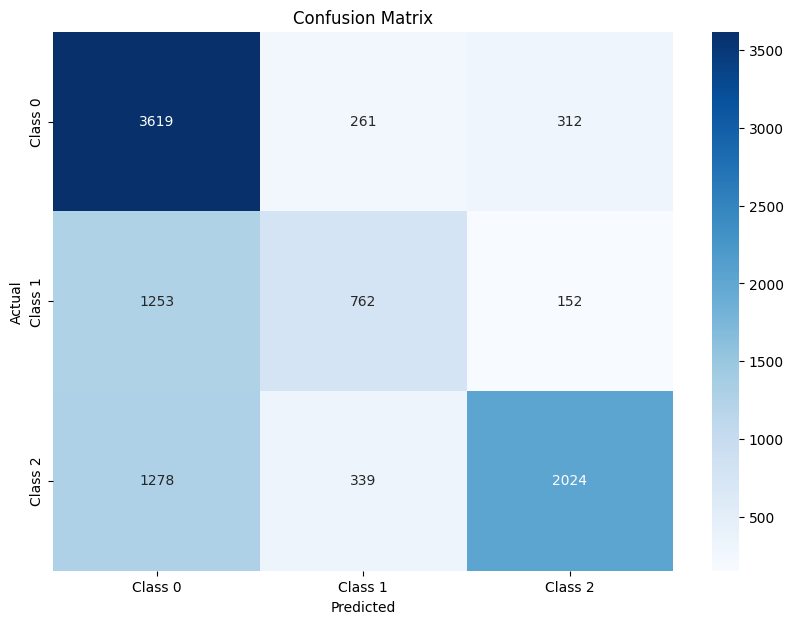

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Set up the figure
plt.figure(figsize=(10, 7))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Change according to your class names
            yticklabels=['Class 0', 'Class 1', 'Class 2'])

# Add labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [23]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset for demonstration)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'final_model.pkl'
joblib.dump(best_rf, model_filename)
print(f"Model saved to {model_filename}")

# Later, when you need to load the model
# Load the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Example: Make predictions with the loaded model
predictions = loaded_model.predict(X_test)
print("Predictions on test data:", predictions)


Model saved to final_model.pkl
Model loaded successfully!
Predictions on test data: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
